In [169]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler as SS
SS=SS()
from sklearn.preprocessing import *
# from sklearn 
import importlib.util
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.metrics import *
from sklearn.model_selection import train_test_split

In [170]:
# spec = importlib.util.spec_from_file_location("DataPreprocessing", "/home/admin1/PycharmProjects/Machine_learning_Python/Utility/DataPreprocessing.py")
# foo = importlib.util.module_from_spec(spec)
# spec.loader.exec_module(foo)
# preprocess_obj = foo.DataPreprocessing()

In [171]:
dataframe = pd.read_csv("Data/bike_sharing.csv",sep=',')

In [172]:
dataframe.sample()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
6912,6913,2011-10-20,4,0,10,15,0,4,1,2,0.48,0.4697,0.51,0.4478,22,138,160


In [173]:
dataframe.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [174]:
dataframe = dataframe.rename(columns={'cnt':'y'})

In [175]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
instant       17379 non-null int64
dteday        17379 non-null object
season        17379 non-null int64
yr            17379 non-null int64
mnth          17379 non-null int64
hr            17379 non-null int64
holiday       17379 non-null int64
weekday       17379 non-null int64
workingday    17379 non-null int64
weathersit    17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
casual        17379 non-null int64
registered    17379 non-null int64
y             17379 non-null int64
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [176]:
dataframe = dataframe.drop('dteday',axis=1)

In [177]:
dataframe.nunique()

instant       17379
season            4
yr                2
mnth             12
hr               24
holiday           2
weekday           7
workingday        2
weathersit        4
temp             50
atemp            65
hum              89
windspeed        30
casual          322
registered      776
y               869
dtype: int64

In [178]:
X = pd.DataFrame(dataframe[dataframe.columns])

In [179]:
X= X.rename(columns={'cnt':'y'})

In [180]:
X.shape

(17379, 16)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5c3673e0b8>,
      dtype=object)

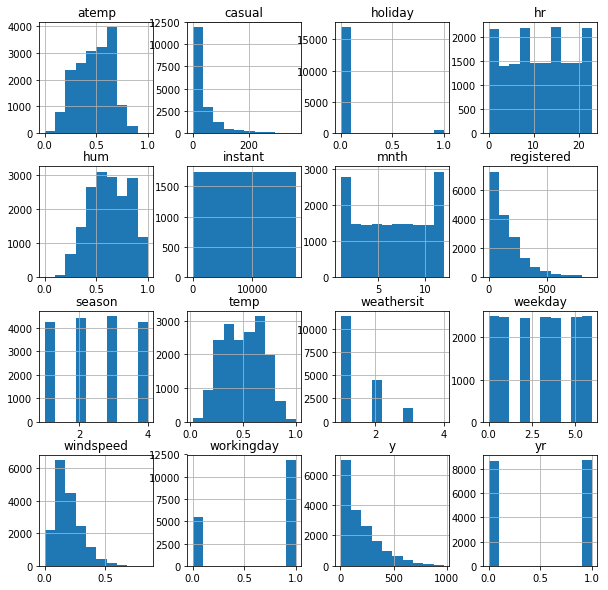

In [181]:
X.hist(figsize=(10,10))

In [182]:
X.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,y
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [183]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 16 columns):
instant       17379 non-null int64
season        17379 non-null int64
yr            17379 non-null int64
mnth          17379 non-null int64
hr            17379 non-null int64
holiday       17379 non-null int64
weekday       17379 non-null int64
workingday    17379 non-null int64
weathersit    17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
casual        17379 non-null int64
registered    17379 non-null int64
y             17379 non-null int64
dtypes: float64(4), int64(12)
memory usage: 2.1 MB


In [184]:
X.isna().sum()

instant       0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
y             0
dtype: int64

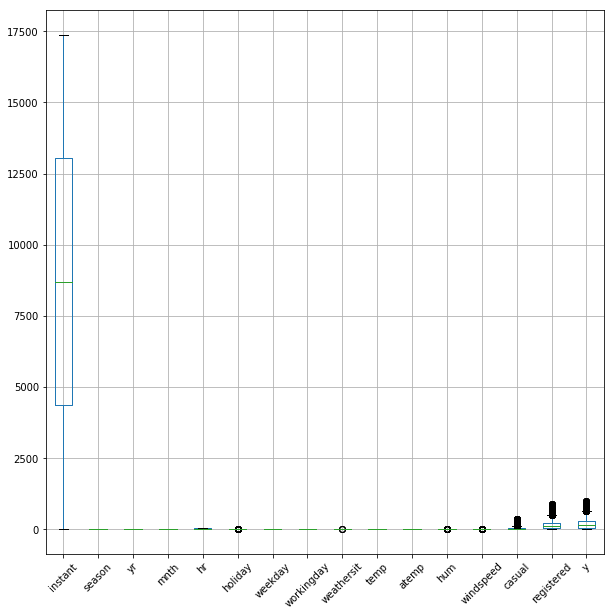

In [185]:
X.boxplot(figsize=(10,10),rot=45)

In [186]:
X.shape

(17379, 16)

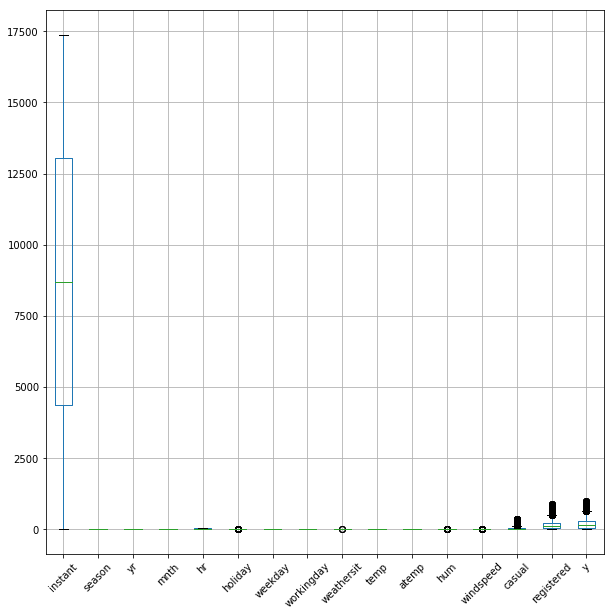

In [ ]:
X.boxplot(figsize=(10,10),rot=45)

In [ ]:
# X = preprocess_obj.remove_outlier(X)

In [ ]:
X.isna().sum()

instant       0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
y             0
dtype: int64

In [ ]:
X = X.dropna()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5c361ef3c8>,
      dtype=object)

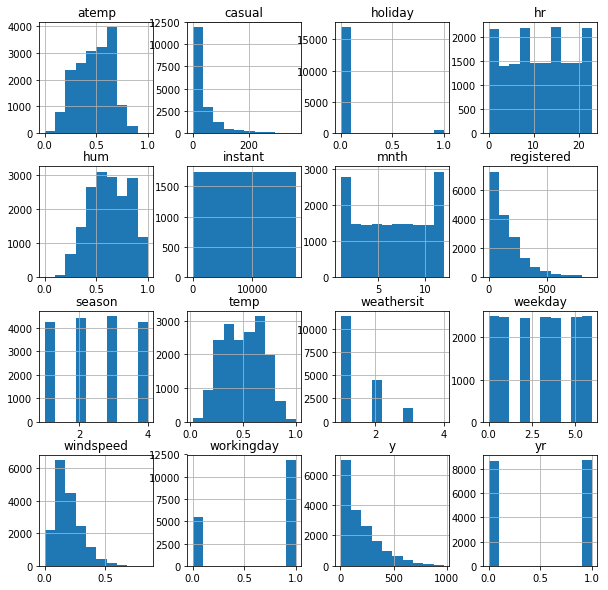

In [ ]:
X.hist(figsize=(10,10))

In [ ]:
X.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,y
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [ ]:
# n = Normalizer().fit(np.array(X['cnt']).reshape(-1,1))
# for item in X:
#     X[item]=n.fit_transform(np.array(X[item]).reshape(-1,1))

In [ ]:
X.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,y
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [ ]:
# trying with scaling the output too output :
# Y = X['y']
# not scaling as the linear regression also will also perfor m scaling.
# rs = RobustScaler().fit(X)
# for item in X:
#     X[item]=rs.fit_transform(np.array(X[item]).reshape(-1,1))
# X['y']=Y

In [ ]:
# for item in X:
#     sns.distplot(X[item])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5c35649ac8>,
      dtype=object)

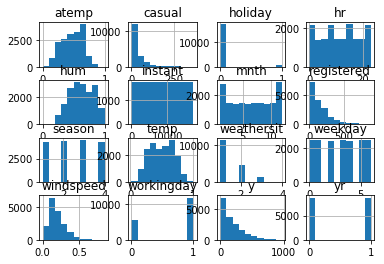

In [ ]:
X.hist()

In [ ]:
class MultiLinearRegression:
    
    def init(self):
        print("In Multi linear regression")
    
    def multi_Linear_Regression_demo(self,dataframe):
        fig = plt.figure(figsize=(12,10))
        ax = Axes3D(fig)
        Y_train = dataframe['y']
        traindata = dataframe.drop('y', axis=1)
        traindata, test_data, Y_train,  Y_test = train_test_split(traindata,Y_train,test_size = 0.3, random_state=0)
        linear_reg = LinearRegression(normalize=True)
        linear_reg.fit(traindata,Y_train)
        Ypred = linear_reg.predict(test_data)
        error_mae = mean_absolute_error(Ypred,Y_test)
        error_rmse = mean_squared_error(Ypred,Y_test)
        accuracy = r2_score(Ypred,Y_test)*100
#         plt.scatter(traindata,Y_train,marker='*',color='r')
#         plt.plot([-2,4],linear_reg.predict(np.array([-2,4]).reshape(2,1)))
#         plt.title('Scattered Points with predicted Line')
        print("Accuracy using R2 score is ",accuracy,'%\n')
        print("mae: {}, mse: {}".format(error_mae,np.sqrt(error_rmse)))
        x0 = traindata.iloc[:,0]
        x1 = traindata.iloc[:,1]
        yp = np.array(np.add(np.multiply(x0,linear_reg.coef_[0]),np.multiply(x1,linear_reg.coef_[1]))).reshape(-1,1)
        ax.scatter(traindata.iloc[:,0],traindata.iloc[:,1],color='g')
        ax.plot_wireframe(X=x0,Y=x1,Z=yp,linewidth = 1.2,color='r')
        print(linear_reg.coef_)
        plt.show()
    
    def main(self,dataframe):
        self.multi_Linear_Regression_demo(dataframe)

if __name__ == '__main__':
    obj = MultiLinearRegression()
    obj.main(dataframe)


Accuracy using R2 score is  100.0 %

mae: 1.9809660028359488e-13, mse: 2.4073050298651143e-13
